In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

# Introduction
<br>
<center><font size=6> Corporate Bankruptcy Prediction </font></center>
* Data Feature:
    1. Data contains 5000 sample points and 30 features.
    2. Data contains default indicator as the label and company fundamental information, e.g sales to total assets, net profit to total assets, as features vectors.
* Model Selection:
    1. Logistic Regression
        * Logistic Regression with over sampling
        * Logistic Regression with under sampling 
    2. Decision Tree
    3. Random Forest
        * Random Forest with over sampling  
        * Random Forest with under sampling 
* Results:
    Random Forest with under sampling has the best result.
    


# Loading and Processing the Data

In [2]:
data1 = pd.read_csv('project_data.csv')
data1 = data1.replace('?', np.nan)
data1.head()

,net profit / total assets,working capital / total assets,retained earnings / total assets,book value of equity / total liabilities,sales / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(total liabilities * 365) / (gross profit + depreciation),gross profit / total assets,gross profit / sales,...,profit on operating activities / sales,(current assets - inventory) / short-term liabilities,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,(short-term liabilities * 365) / cost of products sold),equity / fixed assets,working capital,total costs /total sales,long-term liabilities / equity,defaulted
0,0.038680,0.082838,0.000000,0.78767,0.98145,0.17239,0.10799,1926.4,0.049071,0.049999,...,0.073004,0.49623,0.014732,0.01501,0.31,0.69661,444.38,0.95059,0.30022,0
1,0.040320,-0.013260,0.000000,0.64287,1.60620,0.072031,0.1779,777.52,0.040320,0.025103,...,0,0.77812,-0.245430,-0.1528,0.59202,0.86285,-1219.60,0.60031,0.0057597,0
2,0.043241,0.197270,0.082911,1.6646,1.01370,0.12848,0.061266,1325.3,0.043241,0.026489,...,0.025006,0.9039,-0.015950,-0.009771,0.20899,1.2967,2079.10,0.98651,0.043951,0
3,0.032621,-0.072349,-0.371690,0.0053298,3.35600,0.043675,0.016499,6556.8,0.042140,0.012557,...,0.022524,0.56684,0.062360,0.018582,0.29551,0.049328,-94.83,0.98758,0.0,0
4,0.028320,-0.097934,0.000000,0.29318,1.13110,0.064054,0.086133,2897.0,0.030493,0.026958,...,0.071814,0.19548,0.014296,0.012639,0.45071,0.36456,-1027.80,0.97321,1.227,0


In [3]:
data1.shape

(5000, 31)

In [4]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
net profit / total assets,5000.0,0.034363,0.309707,-9.298100,0.000280,0.038333,0.106575,9.803700e+00
working capital / total assets,5000.0,0.167935,0.788338,-24.431000,0.014754,0.195565,0.416493,2.276900e+01
retained earnings / total assets,5000.0,-0.048330,2.456970,-53.802000,-0.002098,0.000000,0.060596,1.370500e+02
sales / total assets,5000.0,2.095716,24.695170,-0.000014,1.003200,1.160250,1.970325,1.704800e+03
gross profit / total assets,5000.0,0.054917,0.629279,-9.298100,0.001023,0.044727,0.123120,3.861800e+01
profit on operating activities / total assets,5000.0,0.067125,0.649025,-8.966700,0.000000,0.046912,0.122485,3.861800e+01
(equity - share capital) / total assets,5000.0,0.250572,1.244939,-47.531000,0.123720,0.370230,0.604653,1.260200e+01
profit on sales / total assets,5000.0,0.055688,0.642613,-9.043100,0.000007,0.044810,0.123105,3.861800e+01
total sales / total assets,5000.0,2.281201,24.224362,-0.000014,1.028375,1.553400,2.306925,1.704800e+03
constant capital / total assets,5000.0,0.514096,0.953304,-39.156000,0.407702,0.603865,0.775540,1.260200e+01


Many variables had missing values. Variables with many missing values (>1% of 5000 = >50) were dropped. Missing values in the remaining variables were replaced with the medians of the respective variables.


In [5]:
pd.isnull(data1).sum()

net profit / total assets                                                  0
working capital / total assets                                             0
retained earnings / total assets                                           0
book value of equity / total liabilities                                  13
sales / total assets                                                       0
gross profit / short-term liabilities                                     25
(gross profit + depreciation) / sales                                      8
(total liabilities * 365) / (gross profit + depreciation)                  5
gross profit / total assets                                                0
gross profit / sales                                                       8
profit on operating activities / total assets                              0
gross profit (in 3 years) / total assets                                 101
(equity - share capital) / total assets                                    0

In [6]:
data1 = data1.drop(['profit on operating activities / financial expenses',
                    'gross profit (in 3 years) / total assets',
                    'working capital / fixed assets',
                    'equity / fixed assets',
                    'working capital'], axis=1) #used threshold of 1% of 5000 = 50
data1.head()

,net profit / total assets,working capital / total assets,retained earnings / total assets,book value of equity / total liabilities,sales / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(total liabilities * 365) / (gross profit + depreciation),gross profit / total assets,gross profit / sales,...,constant capital / total assets,(current assets - inventory - receivables) / short-term liabilities,profit on operating activities / sales,(current assets - inventory) / short-term liabilities,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,(short-term liabilities * 365) / cost of products sold),total costs /total sales,long-term liabilities / equity,defaulted
0,0.038680,0.082838,0.000000,0.78767,0.98145,0.17239,0.10799,1926.4,0.049071,0.049999,...,0.572890,0.014476,0.073004,0.49623,0.014732,0.01501,0.31,0.95059,0.30022,0
1,0.040320,-0.013260,0.000000,0.64287,1.60620,0.072031,0.1779,777.52,0.040320,0.025103,...,0.393560,0.14324,0,0.77812,-0.245430,-0.1528,0.59202,0.60031,0.0057597,0
2,0.043241,0.197270,0.082911,1.6646,1.01370,0.12848,0.061266,1325.3,0.043241,0.026489,...,0.631030,0.10531,0.025006,0.9039,-0.015950,-0.009771,0.20899,0.98651,0.043951,0
3,0.032621,-0.072349,-0.371690,0.0053298,3.35600,0.043675,0.016499,6556.8,0.042140,0.012557,...,0.005302,0.011696,0.022524,0.56684,0.062360,0.018582,0.29551,0.98758,0.0,0
4,0.028320,-0.097934,0.000000,0.29318,1.13110,0.064054,0.086133,2897.0,0.030493,0.026958,...,0.504890,0.0019375,0.071814,0.19548,0.014296,0.012639,0.45071,0.97321,1.227,0


In [7]:
data1 = data1.fillna(data1.median())

In [8]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
net profit / total assets,5000.0,0.034363,0.309707,-9.298100,0.000280,0.038333,0.106575,9.8037
working capital / total assets,5000.0,0.167935,0.788338,-24.431000,0.014754,0.195565,0.416493,22.7690
retained earnings / total assets,5000.0,-0.048330,2.456970,-53.802000,-0.002098,0.000000,0.060596,137.0500
sales / total assets,5000.0,2.095716,24.695170,-0.000014,1.003200,1.160250,1.970325,1704.8000
gross profit / total assets,5000.0,0.054917,0.629279,-9.298100,0.001023,0.044727,0.123120,38.6180
profit on operating activities / total assets,5000.0,0.067125,0.649025,-8.966700,0.000000,0.046912,0.122485,38.6180
(equity - share capital) / total assets,5000.0,0.250572,1.244939,-47.531000,0.123720,0.370230,0.604653,12.6020
profit on sales / total assets,5000.0,0.055688,0.642613,-9.043100,0.000007,0.044810,0.123105,38.6180
total sales / total assets,5000.0,2.281201,24.224362,-0.000014,1.028375,1.553400,2.306925,1704.8000
constant capital / total assets,5000.0,0.514096,0.953304,-39.156000,0.407702,0.603865,0.775540,12.6020


In [9]:
pd.isnull(data1).sum()

net profit / total assets                                                0
working capital / total assets                                           0
retained earnings / total assets                                         0
book value of equity / total liabilities                                 0
sales / total assets                                                     0
gross profit / short-term liabilities                                    0
(gross profit + depreciation) / sales                                    0
(total liabilities * 365) / (gross profit + depreciation)                0
gross profit / total assets                                              0
gross profit / sales                                                     0
profit on operating activities / total assets                            0
(equity - share capital) / total assets                                  0
(gross profit + interest) / sales                                        0
operating expenses / shor

In [10]:
data1 = data1.astype(float)
data1.dtypes

net profit / total assets                                                float64
working capital / total assets                                           float64
retained earnings / total assets                                         float64
book value of equity / total liabilities                                 float64
sales / total assets                                                     float64
gross profit / short-term liabilities                                    float64
(gross profit + depreciation) / sales                                    float64
(total liabilities * 365) / (gross profit + depreciation)                float64
gross profit / total assets                                              float64
gross profit / sales                                                     float64
profit on operating activities / total assets                            float64
(equity - share capital) / total assets                                  float64
(gross profit + interest) / 

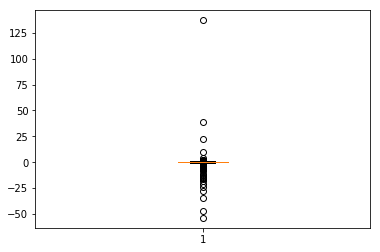

In [11]:
plt.boxplot(data1.iloc[:,1])
plt.boxplot(data1.iloc[:,2])
plt.show()

In [12]:
y = data1.iloc[:,-1]
X = data1.iloc[:,:-1]

In [13]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
net profit / total assets,5000.0,0.034363,0.309707,-9.298100e+00,0.000280,0.038333,0.106575,9.803700e+00
working capital / total assets,5000.0,0.167935,0.788338,-2.443100e+01,0.014754,0.195565,0.416493,2.276900e+01
retained earnings / total assets,5000.0,-0.048330,2.456970,-5.380200e+01,-0.002098,0.000000,0.060596,1.370500e+02
book value of equity / total liabilities,5000.0,6.199198,70.809237,-1.848200e+00,0.401515,1.051300,2.641150,2.800000e+03
sales / total assets,5000.0,2.095716,24.695170,-1.433200e-05,1.003200,1.160250,1.970325,1.704800e+03
gross profit / short-term liabilities,5000.0,-1.002297,91.569422,-6.331800e+03,0.003472,0.129890,0.486645,3.425500e+02
(gross profit + depreciation) / sales,5000.0,-0.015739,19.464510,-7.881100e+02,0.018113,0.060645,0.124240,8.044000e+02
(total liabilities * 365) / (gross profit + depreciation),5000.0,4572.504171,136675.574295,-1.567500e+06,193.202500,887.630000,2510.125000,8.085500e+06
gross profit / total assets,5000.0,0.054917,0.629279,-9.298100e+00,0.001023,0.044727,0.123120,3.861800e+01
gross profit / sales,5000.0,-0.205434,15.894463,-7.881100e+02,0.000740,0.028409,0.080342,3.055000e+02


In [14]:
X.head()

,net profit / total assets,working capital / total assets,retained earnings / total assets,book value of equity / total liabilities,sales / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(total liabilities * 365) / (gross profit + depreciation),gross profit / total assets,gross profit / sales,...,total sales / total assets,constant capital / total assets,(current assets - inventory - receivables) / short-term liabilities,profit on operating activities / sales,(current assets - inventory) / short-term liabilities,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,(short-term liabilities * 365) / cost of products sold),total costs /total sales,long-term liabilities / equity
0,0.038680,0.082838,0.000000,0.78767,0.98145,0.172390,0.107990,1926.40,0.049071,0.049999,...,0.98145,0.572890,0.014476,0.073004,0.49623,0.014732,0.015010,0.31000,0.95059,0.300220
1,0.040320,-0.013260,0.000000,0.64287,1.60620,0.072031,0.177900,777.52,0.040320,0.025103,...,1.60620,0.393560,0.143240,0.000000,0.77812,-0.245430,-0.152800,0.59202,0.60031,0.005760
2,0.043241,0.197270,0.082911,1.66460,1.01370,0.128480,0.061266,1325.30,0.043241,0.026489,...,1.66950,0.631030,0.105310,0.025006,0.90390,-0.015950,-0.009771,0.20899,0.98651,0.043951
3,0.032621,-0.072349,-0.371690,0.00533,3.35600,0.043675,0.016499,6556.80,0.042140,0.012557,...,3.35600,0.005302,0.011696,0.022524,0.56684,0.062360,0.018582,0.29551,0.98758,0.000000
4,0.028320,-0.097934,0.000000,0.29318,1.13110,0.064054,0.086133,2897.00,0.030493,0.026958,...,1.13110,0.504890,0.001937,0.071814,0.19548,0.014296,0.012639,0.45071,0.97321,1.227000


In [15]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: defaulted, dtype: float64

# Split the data

The sample was split into three parts - training 60%, validation 20% and testing 20%. The splitting was done randomly using sklearn.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20)
X_train, X_vald, y_train, y_vald = train_test_split(X_train, y_train, random_state=0, test_size=0.25)
print("X_train.shape: {} y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_vald.shape: {} y_vald.shape: {}".format(X_vald.shape, y_vald.shape))
print("X_test.shape: {} y_test.shape: {}".format(X_test.shape, y_test.shape))

X_train.shape: (3000, 25) y_train.shape: (3000,)
X_vald.shape: (1000, 25) y_vald.shape: (1000,)
X_test.shape: (1000, 25) y_test.shape: (1000,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20)
X_train, X_vald, y_train, y_vald = train_test_split(X_train, y_train, random_state=1, test_size=0.25)
print("X_train.shape: {} y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_vald.shape: {} y_vald.shape: {}".format(X_vald.shape, y_vald.shape))
print("X_test.shape: {} y_test.shape: {}".format(X_test.shape, y_test.shape))

X_train.shape: (3000, 25) y_train.shape: (3000,)
X_vald.shape: (1000, 25) y_vald.shape: (1000,)
X_test.shape: (1000, 25) y_test.shape: (1000,)


# ML Algos

Since the dataset is highly imbalanced, using accuracy to measure our model will be inappropriate. <p>
Recall rate is a good measurement for this kind of imbalanced dataset since the loss for misclassifying a non-bankruptcy company is relative small while the loss for misclassifying a non-bankruptcy company is relative huge. <p>
    We will use recall rate to measure the performance of our models in the parameters validation.

Logistic Regression

Here we train our model in the training set and we use grid search to find the best parameters in the validation set.

In [17]:
C_set=[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4,1e5]
penalty_set=["l2","l1"]
max_score=0
best_model=None
for c in C_set:
    for l in penalty_set:
        LogisticReg01 = LogisticRegression(C=c, penalty=l,random_state=1)
        LogisticReg01.fit(X_train,y_train)
        score=recall_score(y_vald,LogisticReg01.predict(X_vald))
        if score>max_score:
            max_score=score
            best_model=LogisticReg01
print(best_model)


LogisticRegression(C=1e-06, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [18]:
def result(best_model,X_train=X_train,y_train=y_train):
    print("Train score (Accuracy): {:.2f}".format(best_model.score(X_train,y_train)))
    print("Valid score (Accuracy): {:.2f}".format(best_model.score(X_vald,y_vald)))
    print("Test score (Accuracy): {:.2f}".format(best_model.score(X_test,y_test)))

    print("\nTrain score (Precision): {:.2f}".format(precision_score(y_train,best_model.predict(X_train))))
    print("Valid score (Precision): {:.2f}".format(precision_score(y_vald,best_model.predict(X_vald))))
    print("Test score (Precision): {:.2f}".format(precision_score(y_test,best_model.predict(X_test))))

    print("\nTrain score (Recall): {:.2f}".format(recall_score(y_train,best_model.predict(X_train))))
    print("Valid score (Recall): {:.2f}".format(recall_score(y_vald,best_model.predict(X_vald))))
    print("Test score (Recall): {:.2f}".format(recall_score(y_test,best_model.predict(X_test))))

    print("\nTrain score (F1-score): {:.2f}".format(f1_score(y_train,best_model.predict(X_train))))
    print("Valid score (F1-score): {:.2f}".format(f1_score(y_vald,best_model.predict(X_vald))))
    print("Test score (F1-score): {:.2f}".format(f1_score(y_test,best_model.predict(X_test))))
result(best_model)

Train score (Accuracy): 0.82
Valid score (Accuracy): 0.79
Test score (Accuracy): 0.82

Train score (Precision): 0.27
Valid score (Precision): 0.20
Test score (Precision): 0.24

Train score (Recall): 0.44
Valid score (Recall): 0.45
Test score (Recall): 0.43

Train score (F1-score): 0.34
Valid score (F1-score): 0.28
Test score (F1-score): 0.30


Decision Tree

In [19]:
depth_set=[2,3,4,5,10,100,None]
max_features_set=range(1,10,1)
impurity_split_set=[0.1**x for x in range(1,10,1)]
max_score=0
best_model=None
for d in depth_set:
    for f in max_features_set:
        for i in impurity_split_set:
            tree1 = DecisionTreeClassifier(criterion='gini', max_depth=d,
             max_features=f, min_impurity_decrease=i,random_state=1)
            tree1.fit(X_train,y_train)
            score=recall_score(y_vald,tree1.predict(X_vald))
            if score>max_score:
                max_score=score
                best_model=tree1
print(best_model)
result(best_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.00010000000000000002,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')
Train score (Accuracy): 0.99
Valid score (Accuracy): 0.85
Test score (Accuracy): 0.86

Train score (Precision): 1.00
Valid score (Precision): 0.26
Test score (Precision): 0.23

Train score (Recall): 0.91
Valid score (Recall): 0.34
Test score (Recall): 0.23

Train score (F1-score): 0.95
Valid score (F1-score): 0.30
Test score (F1-score): 0.23


From the result we can see that the performance on the test set is not good. This is because Decision Trees are prone to overfit.

RandomForest

Random Forest is a Bagging algorithm that combines several decision trees. It can help with reduce the variance and avoid overfitting.

In [20]:
n_set=[10,50,100]
depth_set=[4,5,10,None]
max_features_set=range(4,10,1)
min_samples_split_set=[2,3,4,5]
min_samples_leaf_set=[2,3,4,5,6]
max_score=0
best_model=None
for d in depth_set:
    for i in min_samples_leaf_set:
        for j in min_samples_split_set:
            for n in n_set:
                for f in max_features_set:
                    rf=RandomForestClassifier(max_depth=d,n_estimators=n, min_samples_leaf=i,min_samples_split=j,max_features=f,random_state=1,n_jobs=-1)
                    rf.fit(X_train,y_train)
                    score=recall_score(y_vald,rf.predict(X_vald))
                    if score>max_score:
                        max_score=score
                        best_model=rf
print(best_model)
result(best_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
Train score (Accuracy): 0.94
Valid score (Accuracy): 0.91
Test score (Accuracy): 0.91

Train score (Precision): 0.99
Valid score (Precision): 0.56
Test score (Precision): 0.53

Train score (Recall): 0.43
Valid score (Recall): 0.15
Test score (Recall): 0.10

Train score (F1-score): 0.60
Valid score (F1-score): 0.24
Test score (F1-score): 0.17


The random forest algortihm here is still highly overfitting, this may caused by the imbalanced data set. 

# Random Under-Sampling </p>
Combine 10% Non-Bankruptcy data all Bankruptcy data

In [21]:
X_train_non=X_train.iloc[np.where(y_train!=1)[0]]
X_train_de=X_train.iloc[np.where(y_train==1)[0]]
X_train_non=X_train_non.iloc[:int(X_train_non.shape[0]*0.1)]
X_train2 = pd.concat([X_train_de,X_train_non])
y_train2=np.array([1]*X_train_de.shape[0]+[0]*(X_train_non.shape[0]))
print(X_train2.shape)
print(y_train2.shape)

(585, 25)
(585,)


In [22]:
n_set=[50,100]
depth_set=[4,5,10,None]
max_features_set=range(4,10,1)
min_samples_split_set=[2,3,4,5]
min_samples_leaf_set=[2,3,4,5,6]
max_score=0
best_model=None
for d in depth_set:
    for i in min_samples_leaf_set:
        for j in min_samples_split_set:
            for n in n_set:
                for f in max_features_set:
                    rf=RandomForestClassifier(max_depth=d,n_estimators=n, min_samples_leaf=i,min_samples_split=j,max_features=f,random_state=1,n_jobs=-1)
                    rf.fit(X_train2,y_train2)
                    score=recall_score(y_vald,rf.predict(X_vald))
                    if score>max_score:
                        max_score=score
                        best_model=rf
print(best_model)
result(best_model,X_train2,y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
Train score (Accuracy): 0.97
Valid score (Accuracy): 0.63
Test score (Accuracy): 0.63

Train score (Precision): 0.97
Valid score (Precision): 0.18
Test score (Precision): 0.18

Train score (Recall): 0.98
Valid score (Recall): 0.84
Test score (Recall): 0.82

Train score (F1-score): 0.97
Valid score (F1-score): 0.30
Test score (F1-score): 0.29


In [23]:
C_set=[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4,1e5]
penalty_set=["l2","l1"]
max_score=0
best_model=None
for c in C_set:
    for l in penalty_set:
        LogisticReg01 = LogisticRegression(C=c, penalty=l,random_state=1)
        LogisticReg01.fit(X_train2,y_train2)
        score=recall_score(y_vald,LogisticReg01.predict(X_vald))
        if score>max_score:
            max_score=score
            best_model=LogisticReg01
print(best_model)
result(best_model)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Train score (Accuracy): 0.24
Valid score (Accuracy): 0.20
Test score (Accuracy): 0.22

Train score (Precision): 0.12
Valid score (Precision): 0.10
Test score (Precision): 0.10

Train score (Recall): 0.95
Valid score (Recall): 0.96
Test score (Recall): 0.93

Train score (F1-score): 0.21
Valid score (F1-score): 0.18
Test score (F1-score): 0.18


Although the recall rate is really high in Logistic Regression with under sampling, the accuracy in this model is too low to be considered. It almost predict all the companies as bankruptcy. Meanwhile, the recall rate is satisfactory in Random Forest and the accuracy for Random Forest is acceptable with under sampling method. 


# Random Over-Sampling <p>
We will sample Bankruptcy data and combine with all the Non-Bankruptcy data as our training set. This method will not lose information in training set and it can make the training set more balanced.

In [24]:
X_train_non=X_train.iloc[np.where(y_train!=1)[0]]
X_train_de=X_train.iloc[np.where(y_train==1)[0]]
n=int(X_train_non.shape[0]/2)
np.random.seed(1)
resample=(np.random.rand(n)*len(X_train_de)).astype("int")
X_train_de_resample=X_train_de.iloc[resample]
X_train2=pd.concat([X_train_de_resample,X_train_non])
y_train2=np.array([1]*X_train_de_resample.shape[0]+[0]*(X_train_non.shape[0]))
print(X_train2.shape)
print(y_train2.shape)

(4024, 25)
(4024,)


In [25]:
np.mean(y_train2)

0.33325049701789267

In [26]:
n_set=[50,100]
depth_set=[4,5,10,None]
max_features_set=range(4,10,1)
min_samples_split_set=[2,3,4,5]
min_samples_leaf_set=[2,3,4,5,6]
max_score=0
best_model=None
for d in depth_set:
    for i in min_samples_leaf_set:
        for j in min_samples_split_set:
            for n in n_set:
                for f in max_features_set:
                    rf=RandomForestClassifier(max_depth=d,n_estimators=n, min_samples_leaf=i,min_samples_split=j,max_features=f,random_state=1,n_jobs=-1)
                    rf.fit(X_train2,y_train2)
                    score=recall_score(y_vald,rf.predict(X_vald))
                    if score>max_score:
                        max_score=score
                        best_model=rf
print(best_model)
result(best_model,X_train2,y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
Train score (Accuracy): 0.81
Valid score (Accuracy): 0.86
Test score (Accuracy): 0.88

Train score (Precision): 0.81
Valid score (Precision): 0.32
Test score (Precision): 0.33

Train score (Recall): 0.54
Valid score (Recall): 0.43
Test score (Recall): 0.31

Train score (F1-score): 0.65
Valid score (F1-score): 0.37
Test score (F1-score): 0.32


In [27]:
C_set=[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4,1e5]
penalty_set=["l2","l1"]
max_score=0
best_model=None
for c in C_set:
    for l in penalty_set:
        LogisticReg01 = LogisticRegression(C=c, penalty=l,random_state=1)
        LogisticReg01.fit(X_train2,y_train2)
        score=recall_score(y_vald,LogisticReg01.predict(X_vald))
        if score>max_score:
            max_score=score
            best_model=LogisticReg01
print(best_model)
result(best_model)

LogisticRegression(C=1e-06, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Train score (Accuracy): 0.82
Valid score (Accuracy): 0.79
Test score (Accuracy): 0.82

Train score (Precision): 0.27
Valid score (Precision): 0.20
Test score (Precision): 0.24

Train score (Recall): 0.44
Valid score (Recall): 0.45
Test score (Recall): 0.43

Train score (F1-score): 0.34
Valid score (F1-score): 0.28
Test score (F1-score): 0.30


The recall rate is not very good in both Logistic Regression and Random Forest with Over Sampling method.

# Conclusion


* Model Selection(Best result):
    * Random forest with under sampling achieves 0.82 recall rate and 0.63 accuracy in the testing data set<p>
* Caveats:
    1. Vanilla decision tree and random forest have overfitting issues on imbalance data.
    2. Resampling methods are very powerful for imbalance data.

    
    
    